<a href="https://colab.research.google.com/github/dourivaljunior/Curso-de-Data-Science/blob/main/aula_data_science_estudo_de_vendas_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estudo de Vendas de um e-commerce.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Importando o arquivo (banco de dados)

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving tabela_dados_ecommerce.csv to tabela_dados_ecommerce.csv


In [ ]:
df = pd.read_csv('tabela_dados_ecommerce.csv') 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Analisando as características da tabela.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94892 entries, 0 to 94891
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cod                        94892 non-null  object 
 1   fullvisitorid              94892 non-null  object 
 2   date                       94891 non-null  object 
 3   channelgrouping            94891 non-null  object 
 4   sessions                   94891 non-null  float64
 5   hits_today                 94891 non-null  float64
 6   pageviews_today            94891 non-null  float64
 7   timeonsite_today           94891 non-null  float64
 8   bounces_today              94891 non-null  float64
 9   newvisits_today            94891 non-null  float64
 10  campaign_today             94891 non-null  object 
 11  medium_today               94891 non-null  object 
 12  keyword_today              47779 non-null  object 
 13  adcontent_today            2057 non-null   obj

In [ ]:
display(df)

,cod,fullvisitorid,date,channelgrouping,sessions,hits_today,pageviews_today,timeonsite_today,bounces_today,newvisits_today,...,hits_lt,pageviews_lt,timeonsite_lt,bounces_lt,transactions_lt,transactionrevenue_lt,transactions_target,transactionrevenue_target,operatingsystem,source_today
0,414,1252191219514313887,2017-04-25,Organic Search,1.0,6.0,5.0,292.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'iOS',b'google'
1,415,891125204708749564,2017-04-25,Organic Search,1.0,18.0,9.0,113.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'Windows',b'google'
2,416,5964009803422820623,2017-04-25,Organic Search,1.0,4.0,4.0,118.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'Windows',b'google'
3,417,8835679077262961520,2017-04-25,Social,1.0,5.0,5.0,261.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'Android',b'youtube'
4,418,9094560543523674756,2017-04-25,Organic Search,1.0,6.0,6.0,133.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'Windows',b'others'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94887,124895,7912737243863069491,2017-05-19,Social,1.0,3.0,3.0,34.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'Macintosh',b'youtube'
94888,124896,8239950188993198154,2017-05-19,Direct,1.0,3.0,3.0,62.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'Macintosh',b'direct'
94889,124897,2076251979479347353,2017-05-19,Referral,1.0,4.0,4.0,320.0,0.0,0.0,...,6.0,6.0,925.0,0.0,0.0,0.0,0.0,0.0,b'Macintosh',b'direct'
94890,124898,1103632435578717576,2017-05-19,Organic Search,1.0,6.0,6.0,67.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'Macintosh',b'google'


# Questões a serem respondidas ao Gerente da Área de Marketing da Empresa:
# 1. De que maneira (busca orgânica, por meio de anúncios, por redes sociais, etc.) os clientes acessam mais o portal para realizarem as suas compras? 
# 2. De que canais os clientes estão mais aceesando o portal (google, portal do E-commerce, redes sociais, etc.) para realizarem suas compras?
# 3. Qual o dispositivo (laptop, celeular ou tablet) é mais usado pelo cliente para acessar o portal?
# 4. Por quanto tempo (em média) um visitante permanece no portal, por dia do mês?
# 5. Qual a principal fonte de acesso ao portal para se efetuar uma compra?
# 6. Qual a média de faturamento por dia e mês?
# 7. Quais os países que mais realizam compras no portal do E-Commerce?

# 1a questão: 
# De que maneira (busca orgânica, meio de anúncios, por redes sociais, etc.) os clientes acessam mais o portal para realizarem as suas compras? 

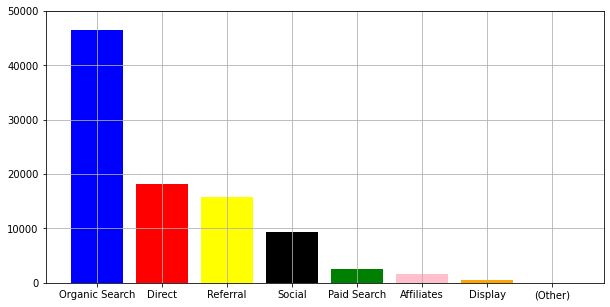

In [ ]:
x1=df['channelgrouping'].value_counts().index
y1=df['channelgrouping'].value_counts()
fig = plt.figure(figsize =(10, 5)) 
paleta_de_cores=['blue','red','yellow','black','green','pink','orange','salmon']
plt.bar(x1,y1,color=paleta_de_cores)
plt.yticks([0,10000,20000,30000,40000,50000])
plt.grid()
plt.show()

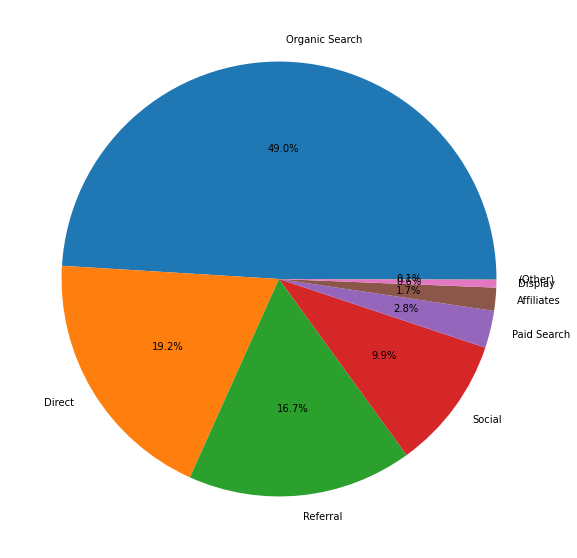

In [ ]:
fig = plt.figure(figsize =(10, 10)) 
plt.pie(y1,labels=x1,autopct="%0.1f%%")
plt.show()

# 2a questão:
# De que canais os clientes estão mais acessando o portal (google, portal do E-commerce, redes sociais, etc.) para realizarem suas compras?

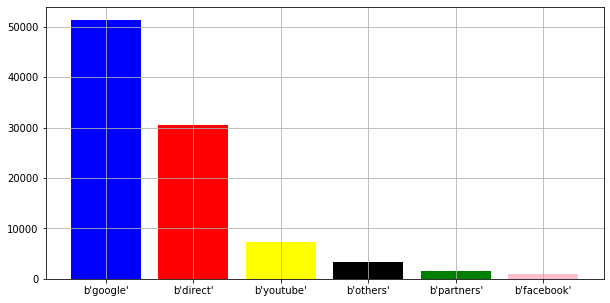

In [ ]:
x2=df['source_today'].value_counts().index
y2=df['source_today'].value_counts()
barra_de_cores=['blue','red','yellow','black','green','pink']
plt.figure(figsize = (10,5))
plt.bar(x2,y2,color=paleta_de_cores)
plt.grid()
plt.show()

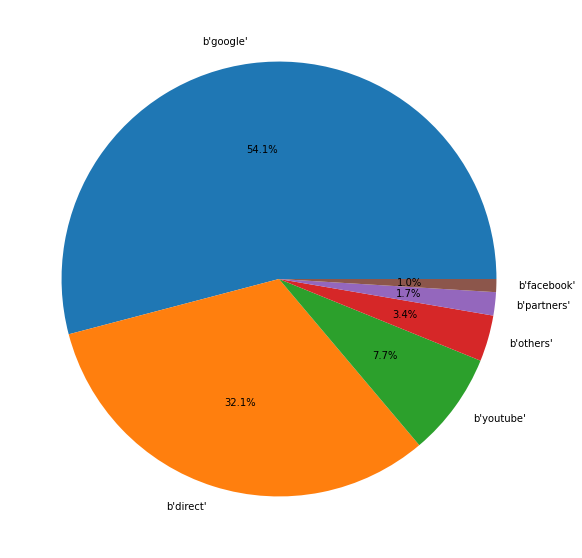

In [ ]:
fig = plt.figure(figsize =(10, 10)) 
plt.pie(y2,labels=x2,autopct="%0.1f%%")
plt.show()

# 3a Questão:
# Qual o dispositivo (laptop, celeular ou tablet) é mais usado pelo cliente para acessar o portal?

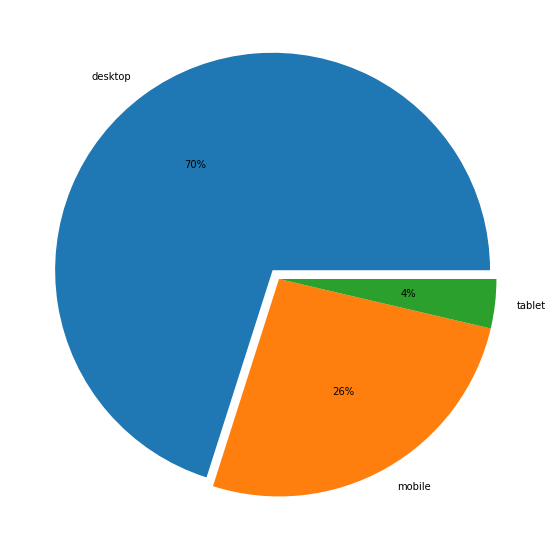

In [ ]:
x3=df['devicecategory'].value_counts().index
y3=df['devicecategory'].value_counts()
fig = plt.figure(figsize =(10, 10)) 
labels = x3
fatias = y3
explode = (0.05,0,0)  
plt.pie(fatias, labels=labels, explode=explode, autopct='%1.0f%%')
plt.show()

# Questão 04.
# Por quanto tempo (em média) um visitante permanece (realizando pesquisas) no portal por dia do mês?

In [ ]:
df['date']=pd.to_datetime(df['date'])
df['dia'] = df['date'].dt.day

In [ ]:
df4=df.groupby(df['dia']).agg({'timeonsite_st':'mean'}).reset_index()
df4.head()

,dia,timeonsite_st
0,1.0,74.730396
1,2.0,75.323869
2,3.0,77.361670
3,4.0,70.738747
4,5.0,91.714044


In [ ]:
x4=df4['dia']
y4=df4['timeonsite_st']

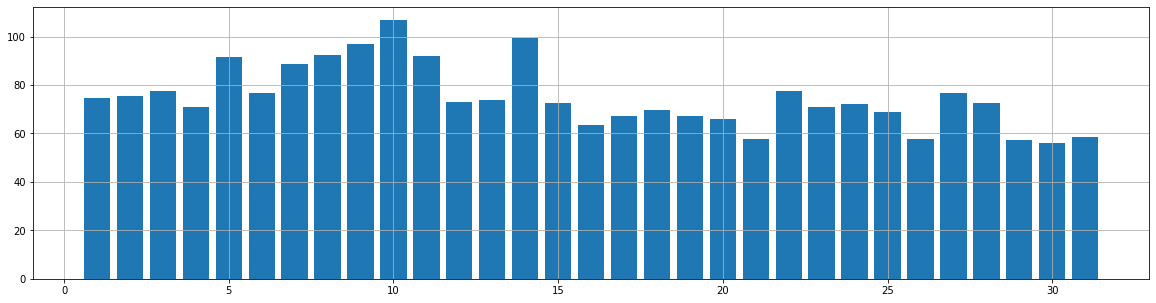

In [ ]:
plt.figure(figsize = (20,5))
plt.bar(x4,y4)
plt.grid()
plt.show()

In [ ]:
y44=df4['timeonsite_st'].mean()

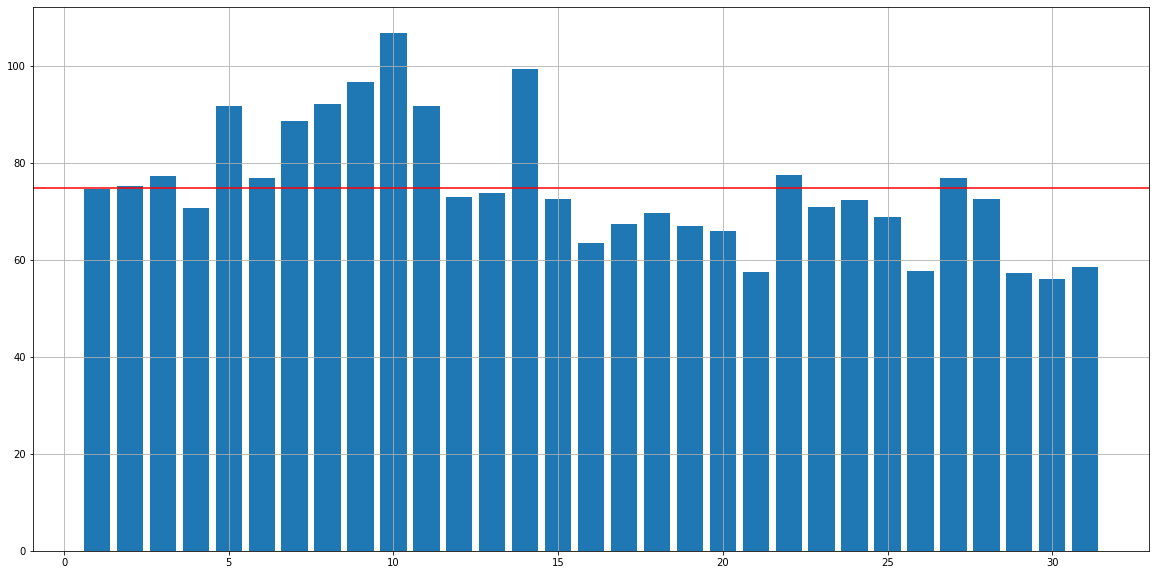

In [ ]:
plt.figure(figsize = (20,10))
plt.bar(x4,y4)
plt.axhline(y44, xmin=0, xmax=30,color='r')
plt.grid()
plt.show()

# Questão 05:
#  Quais os dias que os clientes mais visitam o portal e qual o dia de maior faturamento?

In [ ]:
df5=df.groupby(df['dia']).agg({'transactionrevenue_st':'sum'}).reset_index()

In [ ]:
x5=df5['dia']
y5=df5['transactionrevenue_st']

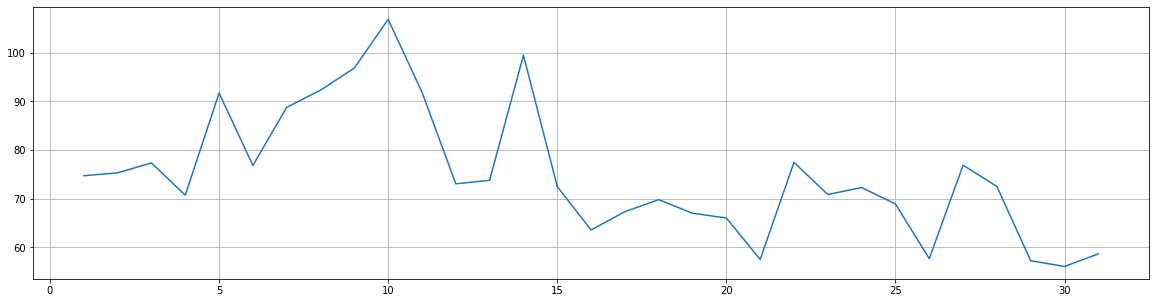

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(x4,y4)
plt.grid()
plt.show()

#Selecionando os dias que os clientes mais realizam compras no portal E-Commerce

In [ ]:
melhores_dias=df5.sort_values('transactionrevenue_st',ascending=False).nlargest(3,'transactionrevenue_st')
print(melhores_dias)

     dia  transactionrevenue_st
12  13.0           3.705576e+10
9   10.0           3.564567e+10
6    7.0           2.574430e+10


# Pergunta 06.
# Quantas visitas, em média, são realizadas pelos clientes ao portal do E-commerce, por dia, ou seja qual o valor médio de pageviews/dia?

In [ ]:
df6=df.groupby(['dia']).agg({'pageviews_st':'sum'}).reset_index()

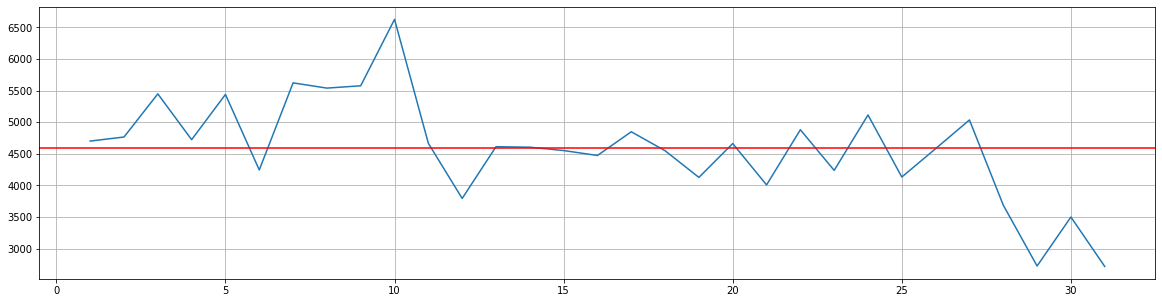

In [ ]:
plt.figure(figsize = (20,5))
y66=df6['pageviews_st'].mean()
plt.plot(df6['dia'],df6['pageviews_st'])
plt.axhline(y=y66, xmin=0, xmax=30,color='r')
plt.grid()
plt.show()

# 7a questão:
# Quais países realizam mais compras no portal do E-Commerce?
# Fazer o ranking de Transações por paises?

In [ ]:
df7=round(df.groupby(['country'])['transactionrevenue_st'].sum().sort_values(ascending=False).nlargest(5),1)
display(df7)

country
United States    2.384832e+11
Canada           1.907480e+09
Belgium          7.280500e+08
Indonesia        6.508100e+08
Venezuela        5.986900e+08
Name: transactionrevenue_st, dtype: float64